In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
(X_train, Y_train) , (X_train_test, Y_train_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(60000, 784)
X_train = X_train.astype(float)/255

In [4]:
model = Sequential([
    tf.keras.Input(shape=(1,)),
    Dense(units=128, activation="relu"),
    Dense(units=256, activation="relu"),
    Dense(units=784, activation="linear")
])
model.compile(loss=BinaryCrossentropy(from_logits=True), optimizer=Adam(learning_rate=0.01))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,768 (917.06 KB)

 Trainable params: 234,768 (917.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(Y_train, X_train, epochs=10, batch_size=256)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


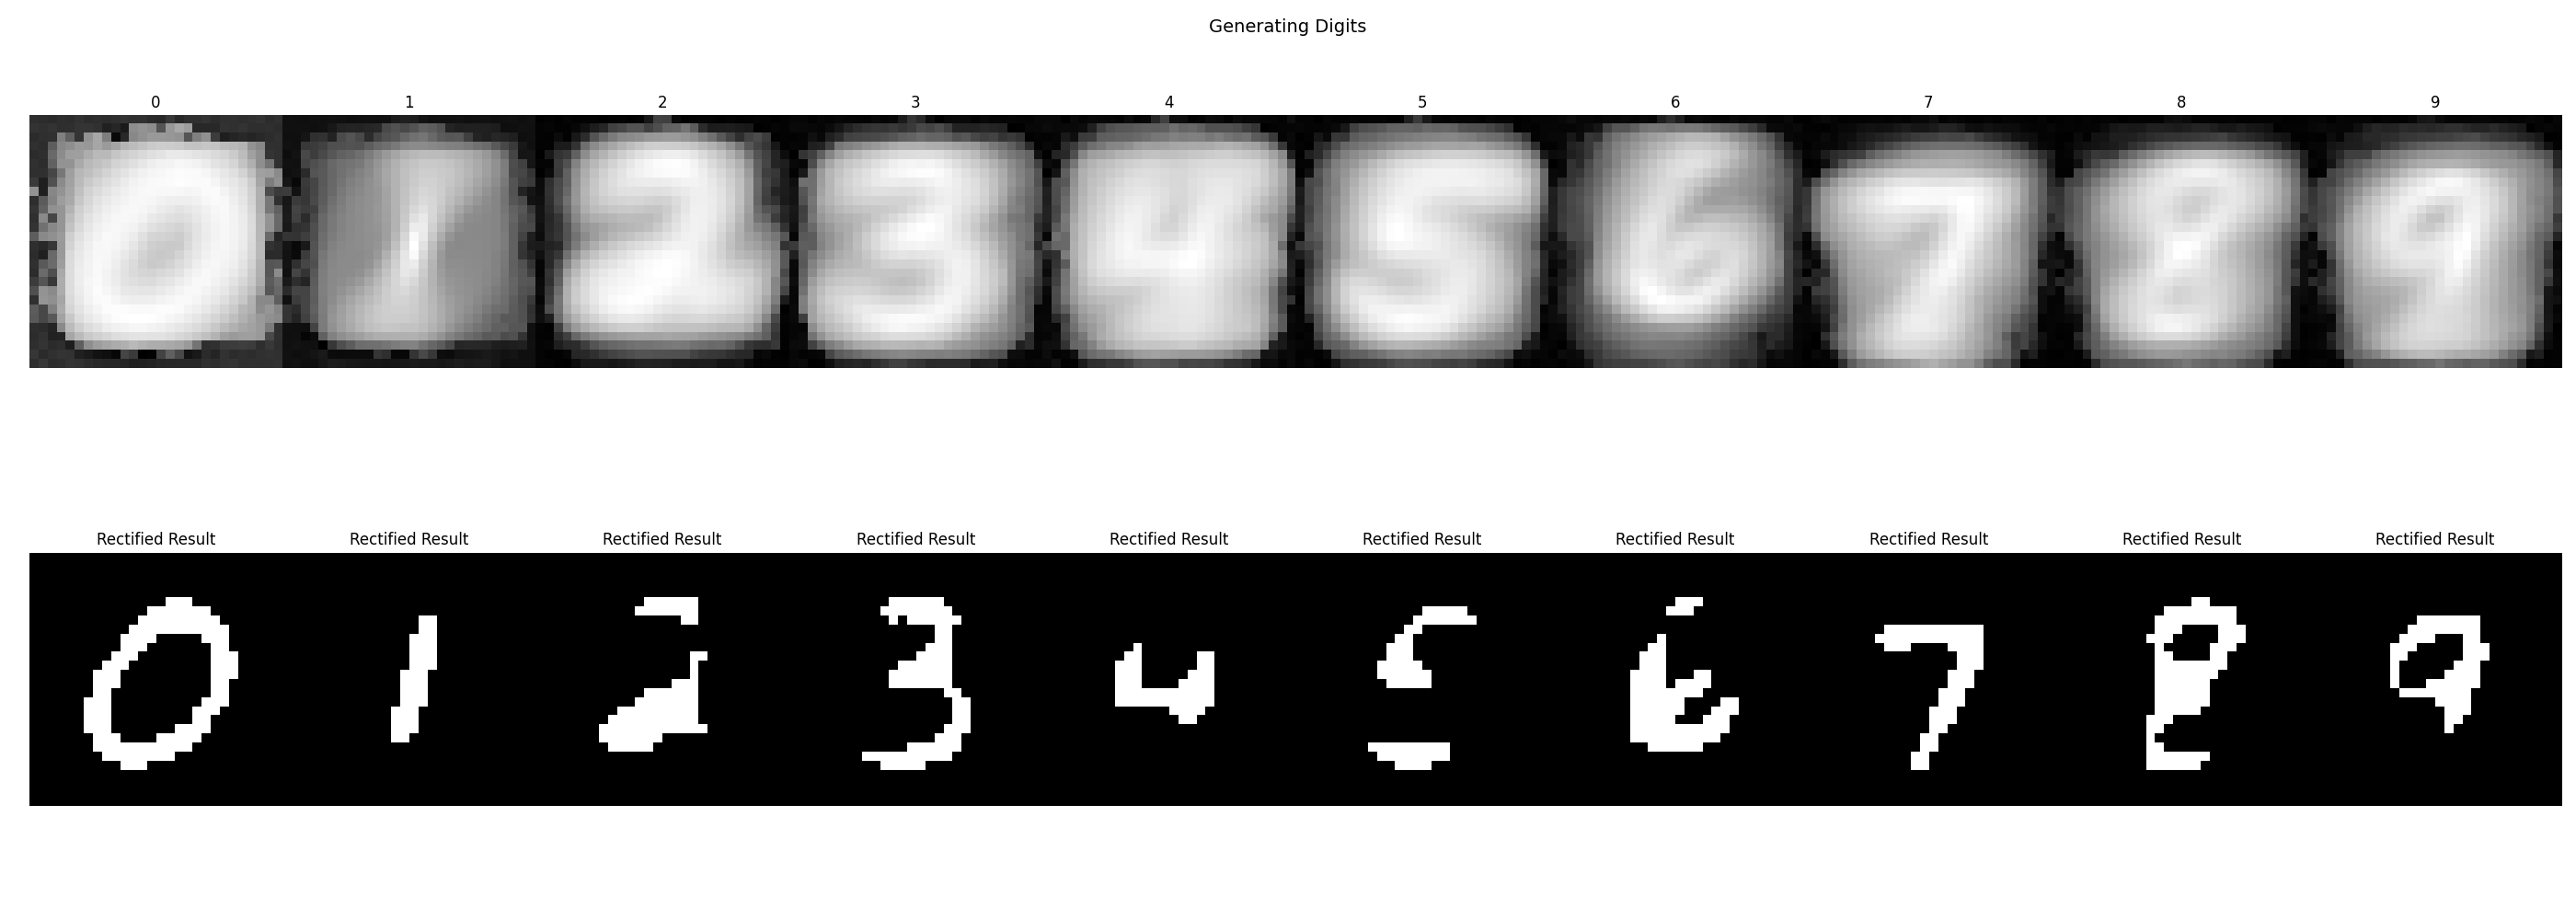

In [115]:
fig, axes = plt.subplots(2, 10, figsize=(28, 10))
fig.suptitle("Generating Digits", fontsize=14)
fig.tight_layout(pad=0.01)
fig.subplots_adjust(hspace=0,wspace=0)
for i in range(10):
    sample = model.predict(np.array([[i]]))
    ax = axes[0][i]
    ax.set_title(f"{i}")
    ax.imshow(sample.reshape(28, 28), cmap="gray")
    ax.set_axis_off()

    threshold = 1e-3
    fined_sample = np.zeros_like(sample)
    fined_sample = (sample > threshold).astype(int)
    ax = axes[1][i]
    ax.set_title("Rectified Result")
    ax.imshow(fined_sample.reshape(28, 28), cmap="gray")
    ax.set_axis_off()
fig.savefig("./gen.jpg", dpi=250)